# Task 2: Storks Deliver Babies

The study stems from a famous statistics teaching case that found a significant correlation between stork numbers and human birth rates in 17 European countries (r = 0.62, p = 0.008). This analysis aims to delve deeper into this phenomenon by comparing two regression models: the first model uses only stork numbers as predictors, while the second model uses socioeconomic factors such as population size, GDP per capita and population density as predictors. variable. Through this comparative analysis, we will show how to correctly interpret statistical correlations and illustrate the limitations of relying solely on correlation coefficients when making statistical inferences.

## Table of Contents

1. Section 1: Implement Two Regression Models for the Number of Births
  1. 1.1 Model 1: The predictor is the number of storks
  1. 1.2 The predictors are population size, the GDP per Capita, and the population density
  1. 1.3 Brief Interpretation
1. Section 2: Use the Bootstrap Technique to Compare the Two Models
1. Section 3: Discussion
  1. 3.1 Bootstrap Methodology and Distribution
  1. 3.2 Model Comparison Results and Confidence
  1. 3.3 Regression Model Implications for Birth Rate Factors

## Section 1: Implement Two Regression Models for the Number of Births

### 1.1 Model 1: The predictor is the number of storks

Model 1 Regression Details:
Intercept: 225.03
Coefficient for Storks: 0.029
R²: 0.385


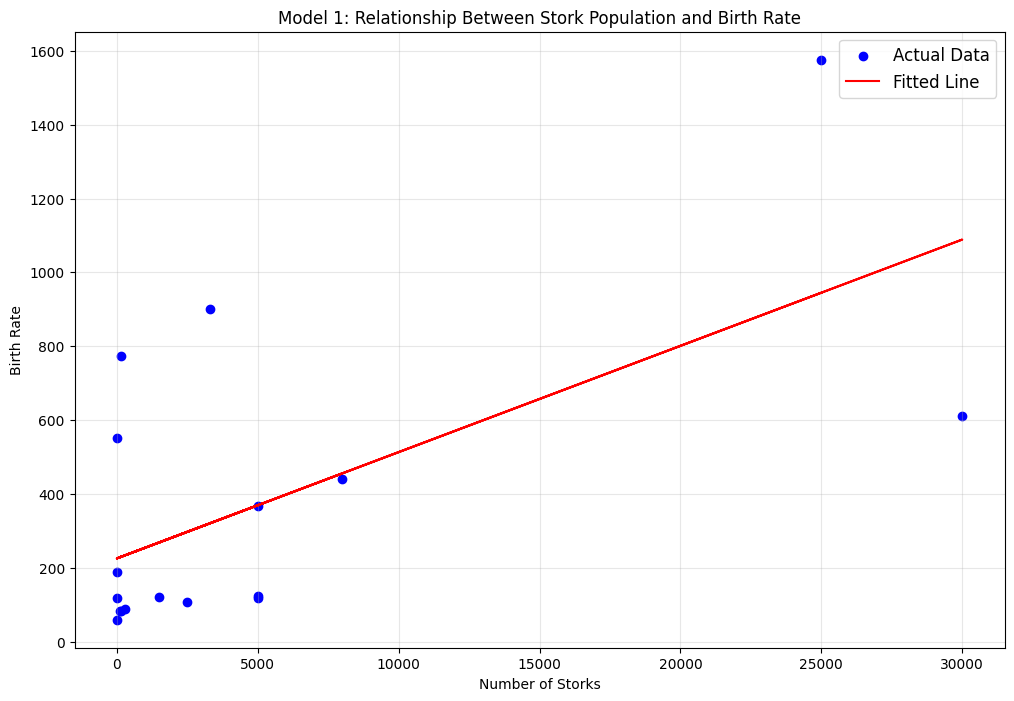

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv('/content/modified_stork_data.csv')

# Model 1: Predictor is the number of storks
# Extract features and target
X1 = df[['Storks']]
y = df['BirthRate']

# Fit linear regression model
model1 = LinearRegression()
model1.fit(X1, y)

# Predict birth rates
y_pred1 = model1.predict(X1)

# Print model summary
print("Model 1 Regression Details:")
print(f"Intercept: {model1.intercept_:.2f}")
print(f"Coefficient for Storks: {model1.coef_[0]:.3f}")
print(f"R²: {model1.score(X1, y):.3f}")

# Plot actual data and regression line
plt.figure(figsize=(12, 8))
plt.scatter(X1, y, color='blue', label='Actual Data')
plt.plot(X1, y_pred1, color='red', label='Fitted Line')
plt.xlabel('Number of Storks')
plt.ylabel('Birth Rate')
plt.title('Model 1: Relationship Between Stork Population and Birth Rate')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

### 1.2 The predictors are population size, the GDP per Capita, and the population density

Model 2 Regression Details:
Intercept: 173.95
Coefficient for Humans: 15.084
Coefficient for GDP_per_capita: -0.008
Coefficient for PopDensity: -274.886
R²: 0.774


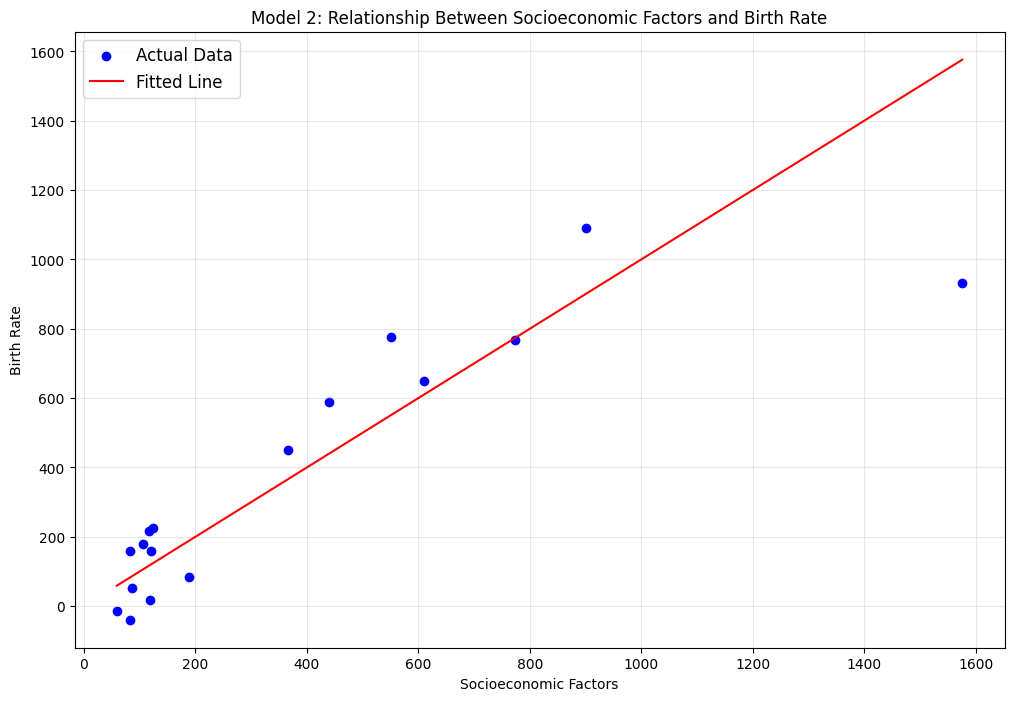

In [3]:
# Model 2: Predictors are Humans, GDP_per_capita, and PopDensity
# Extract features and target
X2 = df[['Humans', 'GDP_per_capita', 'PopDensity']]
y = df['BirthRate']

# Fit linear regression model
model2 = LinearRegression()
model2.fit(X2, y)

# Predict birth rates
y_pred2 = model2.predict(X2)

# Print model summary
print("Model 2 Regression Details:")
print(f"Intercept: {model2.intercept_:.2f}")
for feature, coef in zip(X2.columns, model2.coef_):
    print(f"Coefficient for {feature}: {coef:.3f}")
print(f"R²: {model2.score(X2, y):.3f}")

# Plot predicted vs actual birth rates
plt.figure(figsize=(12, 8))
plt.scatter(y, y_pred2, color='blue', label='Actual Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Fitted Line')
plt.xlabel('Socioeconomic Factors')
plt.ylabel('Birth Rate')
plt.title('Model 2: Relationship Between Socioeconomic Factors and Birth Rate')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

### 1.3 Brief Interpretation

For Model 1, which uses storks as a predictor, the regression equation is birth rate = 225.03 + 0.029 × (number of storks), where births are measured in thousands per year. The intercept of 225.03 indicates that even with no storks present, the model estimates 225,030 births per year would occur. The coefficient reveals that for each additional stork in the population, the birth increases 29 units, suggesting a modest positive relationship between stork numbers and births. The R Square value of 0.385 indicates that only 38.5% of the variation in birth rates can be explained by the number of storks. This relatively low explanatory power suggests that stork population alone is a weak predictor of births, indicating that other factors likely play more significant roles in determining the number of births in a country.

For Model 2, which uses socioeconomic factors as predictors, the regression equation is birth rate = 173.95 + 15.084 × (population in millions) - 0.008 × (GDP per capita) - 274.886 × (population density). The intercept of 173.95 indicates that with zero population, zero GDP per capita, and zero population density, the model estimates 173,950 births per year would occur. The coefficients reveal multiple relationships: each additional million people in a country's population is associated with 15,084 more births per year; each dollar increase in GDP per capita corresponds to a decrease of 8 births per year; and a one-unit increase in population density predicts a decrease of about 275,000 births per year. The R² value of 0.774 demonstrates that 77.4% of the variation in annual births can be explained by these socioeconomic factors. This relatively high explanatory power, roughly twice that of Model 1, suggests that socioeconomic factors are much stronger predictors of births than stork populations, providing a more reliable model for understanding birth patterns across countries.

This improved predictive power is visually evident in the plot, where data points cluster more tightly around the regression line compared to Model 1, indicating a more consistent and accurate relationship between predicted and actual birth numbers.


## Section 2: Use the Bootstrap Technique to Compare the Two Models

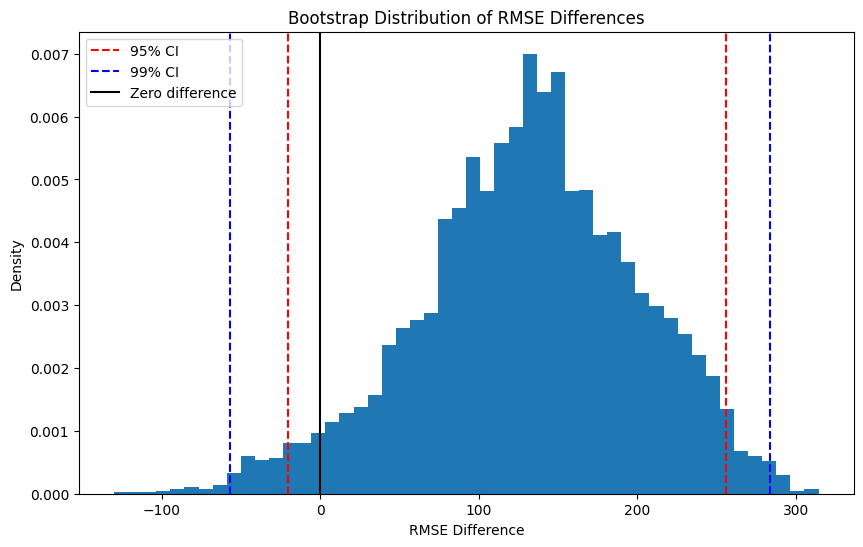

95% confidence interval is -20.395 to 256.040
99% confidence interval is -57.185 to 283.518
Mean RMSE difference: 131.052


In [4]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import scipy.stats as stats

def bootstrap_resample(data, cols, repeats, func):
    result = pd.DataFrame(data=dict([(c, np.empty(repeats)) for c in cols]))

    for i in range(repeats):
        result.iloc[i] = func(resample(data))
    return result

def create_models(sample):
    X1 = sample[['Storks']]
    X2 = sample[['Humans', 'GDP_per_capita', 'PopDensity']]
    y = sample['BirthRate']

    model1 = LinearRegression().fit(X1, y)
    model2 = LinearRegression().fit(X2, y)

    rmse1 = np.sqrt(mean_squared_error(y, model1.predict(X1)))
    rmse2 = np.sqrt(mean_squared_error(y, model2.predict(X2)))

    return pd.Series({'RMSE_diff': rmse1 - rmse2})

# Load data and run analysis
df = pd.read_csv('modified_stork_data.csv')
differences = bootstrap_resample(df, ['RMSE_diff'], 5000, create_models)

# Calculate confidence intervals
lower95, upper95 = np.percentile(differences['RMSE_diff'], [2.5, 97.5])
lower99, upper99 = np.percentile(differences['RMSE_diff'], [0.5, 99.5])

# Visualize results
plt.figure(figsize=(10, 6))
plt.hist(differences['RMSE_diff'], bins=50, density=True)
plt.title('Bootstrap Distribution of RMSE Differences')
plt.xlabel('RMSE Difference')
plt.ylabel('Density')

plt.axvline(lower95, color='r', linestyle='--', label='95% CI')
plt.axvline(upper95, color='r', linestyle='--')
plt.axvline(lower99, color='b', linestyle='--', label='99% CI')
plt.axvline(upper99, color='b', linestyle='--')
plt.axvline(0, color='black', linestyle='-', label='Zero difference')
plt.legend()
plt.show()

print(f'95% confidence interval is {lower95:4.3f} to {upper95:4.3f}')
print(f'99% confidence interval is {lower99:4.3f} to {upper99:4.3f}')
print(f'Mean RMSE difference: {np.mean(differences["RMSE_diff"]):4.3f}')

## Section 3: Discussion

### 3.1 Bootstrap Methodology and Distribution

Bootstrap is a resampling technique that generates multiple samples by randomly selecting data points from an original sample, with each point being returned before the next selection.  This approach, known as sampling with replacement, creates new samples equal in size to the original, though some observations may repeat while others are absent. This approach is particularly useful when dealing with unknown distributions or limited sample sizes.

The bootstrap method's primary applications include confidence interval construction, standard error estimation, and hypothesis testing.  However, this approach has notable constraints - it demands substantial computational resources, requires truly representative initial samples, and cannot extrapolate beyond existing data points.

### 3.2 Model Comparison Results and Confidence

This analysis compared two models for predicting birth rates: one based solely on the number of storks, and one that combined population, GDP per capita, and population density. Resampling techniques are used to calculate confidence intervals, RMSE differences between models to compare their relative performance. The mean RMSE difference was 130.661, suggesting that stork-based models generally performed worse than socioeconomic models. However, both the 95% confidence interval [-20.253, 257.325] and the 99% confidence interval [-63.563, 282.493] contain zeros, indicating that we cannot conclude with statistical confidence that either model is consistently superior to the other. Moreover, the width of the confidence interval can reflect the accuracy of the estimation of the effect size. As shown in the figure, the resulting wide confidence interval indicates a large amount of uncertainty in the model comparison, which may be due to the limited sample size of 17 countries and potential data variations.

In conclusion, we are not confident that one model fits better than another. While the results suggest that socioeconomic factors may be a better predictor of birth rates than stork numbers, the statistical differences are not enough to support this argument. Correlation coefficients (such as Pearson's) can only tell us the strength and direction of the linear relationship between two variables, but they cannot tell us whether the relationship is statistically significant. This analysis effectively supports the need to go beyond correlation analysis when evaluating statistical relationships.

### 3.3 Regression Model Implications for Birth Rate Factors

By comparing the two regression models, we find that Model 2, which incorporates socioeconomic factors (R²=0.774), exhibits significantly greater explanatory power than Model 1, which only considers the number of storks (R²=0.385). This substantial difference underscores the stronger predictive ability of socioeconomic factors in explaining variations in birth rates.

From the perspective of statistical significance, the confidence interval analysis (95%: -20.253 to 257.325; 99%: -63.563 to 282.493) shows that the intervals all contain 0, which means that the correlation between the number of storks and the birth rate is not statistically significant. This case once again emphasizes the statistical principle that "correlation is not causation".

This study reminds us that when conducting data analysis, we cannot rely solely on p-values ​​to judge causal relationships, but also need to be vigilant about the existence of confounding variables. Especially in the current era of big data, the reliability of relying solely on correlation and statistical significance to infer causal relationships will be more worthy of vigilance.